In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# from sklearn.feature_selection import r_regression
# from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# load utilities

%run ./utility/utilities.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.29.5
ipywidgets       : 8.1.3
jupyter_client   : 8.6.2
jupyter_core     : 5.7.2
jupyter_server   : 2.7.0
jupyterlab       : 4.2.3
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.1
qtconsole        : 5.5.2
traitlets        : 5.14.3


In [5]:
# standardize dataset
def preprocess(x):
    return (x - np.mean(x)) / np.std(x)

In [6]:
# (B001 - B131) 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/BladderCancer_132P_TIL_prd1.xlsx')
data = data.loc[0:130]

Ndata = data[['ID','Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI',\
              'NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology',\
              'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor',\
              'Overall_TIL_growth']].copy()

Ndata = Ndata.replace(to_replace="Yes",value="Yes TIL")
Ndata = Ndata.replace(to_replace="No",value="No TIL")

Ndata = Ndata.replace(r'^\s*$', np.nan, regex=True) # Replace Blank values with DataFrame.replace() methods.

Extracted_col0 = Ndata.iloc[:,0:1]  # "ID"
Extracted_col1 = Ndata['Surgeon'];                           Extracted_col2 = Ndata['Age_at_Surgery']
Extracted_col3 = Ndata['Race'];                              Extracted_col4 = Ndata['Surgery']
Extracted_col5 = Ndata['Smoker'];                            Extracted_col6 = Ndata['BMI']
Extracted_col7 = Ndata['NAC'];                               Extracted_col8 = Ndata['cT']
Extracted_col9 = Ndata['pT'];                                Extracted_col10 = Ndata['cT_or_pT']
Extracted_col11 = Ndata['pN'];                               Extracted_col12 = Ndata['Bx_Histology']
Extracted_col13 = Ndata['Histology'];                        Extracted_col14 = Ndata['Sample_weight_g_tumor']
Extracted_col15 = Ndata['Tumor_digest_count_primary_tumor']; Extracted_col16 = Ndata['Number_of_fragments_plated_tumor']
Extracted_col17 = Ndata['Overall_TIL_growth']

ndata_sel = Extracted_col0
ndata_sel = ndata_sel.join(Extracted_col1); ndata_sel = ndata_sel.join(Extracted_col2)
ndata_sel = ndata_sel.join(Extracted_col3); ndata_sel = ndata_sel.join(Extracted_col4)
ndata_sel = ndata_sel.join(Extracted_col5); ndata_sel = ndata_sel.join(Extracted_col6)
ndata_sel = ndata_sel.join(Extracted_col7); ndata_sel = ndata_sel.join(Extracted_col8)
ndata_sel = ndata_sel.join(Extracted_col9); ndata_sel = ndata_sel.join(Extracted_col10)
ndata_sel = ndata_sel.join(Extracted_col11); ndata_sel = ndata_sel.join(Extracted_col12)
ndata_sel = ndata_sel.join(Extracted_col13); ndata_sel = ndata_sel.join(Extracted_col14)
ndata_sel = ndata_sel.join(Extracted_col15); ndata_sel = ndata_sel.join(Extracted_col16)
ndata_sel = ndata_sel.join(Extracted_col17)

ndata_sel = ndata_sel.rename(columns={'Overall_TIL_growth': 'OverallTILGrowth'})

Cols = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)',\
        'OverallTILGrowth']

feats = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)']

feat_labels = feats

In [7]:
ndata_sel = ndata_sel.replace(to_replace='Yes TIL',value='1')
ndata_sel = ndata_sel.replace(to_replace='No TIL',value='-1')

ndata_filt = ndata_sel
ndata_filt.dropna(subset=['OverallTILGrowth'],inplace=True) # drop rows with Nan, no entries

print(ndata_filt.shape)

(106, 18)


In [8]:
## creating the External dataset

# IDs to remove
ids_to_remove = [
    'B035', 'B023', 'B089', 'B102', 'B091', 'B093', 'B002', 
    'B008', 'B004', 'B015', 'B020', 'B014', 'B099', 'B083', 
    'B012', 'B028', 'B021', 'B052', 'B054', 'B027'
]

# Filter rows where 'ID' is in ids_to_remove
ndata_filt_20p = ndata_filt[ndata_filt['ID'].isin(ids_to_remove)]

# Remove these rows from df1
ndata_filt_86p = ndata_filt[~ndata_filt['ID'].isin(ids_to_remove)]

In [9]:
print(ndata_filt_20p.shape)

(20, 18)


In [10]:
print(ndata_filt_86p.shape)

(86, 18)


In [11]:
# ndata_filt_86p.head()

ndata_filt_86p.reset_index(drop=True, inplace=True)
ndata_filt_86p

,ID,Surgeon,Age_at_Surgery,Race,Surgery,Smoker,BMI,NAC,cT,pT,cT_or_pT,pN,Bx_Histology,Histology,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor,OverallTILGrowth
0,B001,4.0,68.0,1.0,1.0,1.0,21.05,1.0,4.0,6.0,4.0,0.0,1.0,1.0,1.6600,60000000.0,24.0,-1
1,B003,1.0,61.0,1.0,1.0,2.0,26.28,0.0,7.0,9.0,7.0,1.0,1.0,7.0,1.1700,3500000.0,12.0,1
2,B009,1.0,71.0,1.0,1.0,1.0,20.19,1.0,4.0,8.0,4.0,3.0,1.0,1.0,0.0000,210000.0,12.0,-1
3,B011,4.0,73.0,1.0,1.0,1.0,33.95,0.0,4.0,5.0,4.0,1.0,1.0,1.0,0.0000,2000000.0,10.0,-1
4,B013,4.0,68.0,1.0,1.0,0.0,21.32,1.0,7.0,11.0,7.0,0.0,1.0,2.0,0.3400,465000.0,6.0,1
5,B017,4.0,79.0,1.0,1.0,1.0,27.13,1.0,4.0,2.0,4.0,0.0,1.0,1.0,0.6000,2500000.0,10.0,1
6,B018,2.0,77.0,1.0,1.0,2.0,22.20,0.0,4.0,6.0,4.0,0.0,4.0,4.0,0.0000,2900000.0,8.0,1
7,B019,4.0,54.0,1.0,1.0,2.0,22.65,0.0,4.0,5.0,4.0,0.0,1.0,7.0,1.8000,84000000.0,24.0,1
8,B024,4.0,60.0,1.0,1.0,2.0,24.10,0.0,3.0,9.0,3.0,1.0,1.0,4.0,0.0000,3500000.0,24.0,1
9,B026,4.0,60.0,1.0,2.0,2.0,30.77,1.0,4.0,5.0,4.0,NaN,1.0,13.0,0.0000,1500000.0,24.0,1


In [12]:
# remove y column and ID from ndata_16f_93p

X_ndata_filt_86p = ndata_filt_86p.drop('OverallTILGrowth', axis=1)
X_ndata_filt_86p = X_ndata_filt_86p.drop('ID', axis=1)

print(X_ndata_filt_86p.shape)

(86, 16)


In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats

col_to_scale = ['Age_at_Surgery', 'BMI','Sample_weight_g_tumor', 'Tumor_digest_count_primary_tumor']

def midas_impl(missing, col_to_scale, n_epoch):
    missing_cp = missing.copy() # make copy of missing df
    
    # scaler = MinMaxScaler().fit(missing_cp[col_to_scale]) # scale data
    scaler = StandardScaler().fit(missing_cp[col_to_scale]) # scale data
    missing_sc = scaler.transform(missing_cp[col_to_scale]) # this is an array, convert to df

    missing_df = pd.DataFrame({'Age_at_Surgery':missing_sc[:,0],
                               'BMI':missing_sc[:,1],
                               'Sample_weight_g_tumor':missing_sc[:,2],
                               'Tumor_digest_count_primary_tumor':missing_sc[:,3],
                               })
    
    # Extract cat columns from missing
    ext_col1 = missing_cp['Surgeon']
    ext_col2 = missing_cp['Race']
    ext_col3 = missing_cp['Surgery']
    ext_col4 = missing_cp['Smoker']
    ext_col5 = missing_cp['NAC']
    ext_col6 = missing_cp['cT']
    ext_col7 = missing_cp['pT']
    ext_col8 = missing_cp['cT_or_pT']
    ext_col9 = missing_cp['pN']
    ext_col10 = missing_cp['Bx_Histology']
    ext_col11 = missing_cp['Histology']
    ext_col12 = missing_cp['Number_of_fragments_plated_tumor']

    # Add the extracted cat columns to missing_df
    missing_df = pd.concat([missing_df, ext_col1.rename('Surgeon')], axis=1)
    missing_df = pd.concat([missing_df, ext_col2.rename('Race')], axis=1)
    missing_df = pd.concat([missing_df, ext_col3.rename('Surgery')], axis=1)
    missing_df = pd.concat([missing_df, ext_col4.rename('Smoker')], axis=1)
    missing_df = pd.concat([missing_df, ext_col5.rename('NAC')], axis=1)
    missing_df = pd.concat([missing_df, ext_col6.rename('cT')], axis=1)
    missing_df = pd.concat([missing_df, ext_col7.rename('pT')], axis=1)
    missing_df = pd.concat([missing_df, ext_col8.rename('cT_or_pT')], axis=1)
    missing_df = pd.concat([missing_df, ext_col9.rename('pN')], axis=1)
    missing_df = pd.concat([missing_df, ext_col10.rename('Bx_Histology')], axis=1)
    missing_df = pd.concat([missing_df, ext_col11.rename('Histology')], axis=1)
    missing_df = pd.concat([missing_df, ext_col12.rename('Number_of_fragments_plated_tumor')], axis=1)

    missing_df.to_csv('missing.csv')
    data_0 = pd.read_csv('missing.csv')
    data_0.columns.str.strip()

    # categorical = ['Surgeon','cT_or_pT','Number_of_fragments_plated_tumor']
    categorical = ['Surgeon','Race','Surgery','Smoker','NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology','Number_of_fragments_plated_tumor']
    
    data_cat, cat_cols_list = md.cat_conv(data_0[categorical])

    data_0.drop(categorical, axis = 1, inplace = True)
    constructor_list = [data_0]
    constructor_list.append(data_cat)
    data_in = pd.concat(constructor_list, axis=1)

    na_loc = data_in.isnull()
    data_in[na_loc] = np.nan

    # imputer = md.Midas(layer_structure = [128,128], vae_layer = True, seed = 89, input_drop = 0.75, learn_rate = 0.0001)
    imputer = md.Midas(layer_structure = [128,128], vae_layer = False, seed = 42, input_drop = 0.75, learn_rate = 0.001)
    imputer.build_model(data_in, softmax_columns = cat_cols_list)
    imputer.train_model(training_epochs = n_epoch)

    # do not update M
    imputations = imputer.generate_samples(m=20).output_list

    flat_cats = [cat for variable in cat_cols_list for cat in variable]
    for i in range(len(imputations)):
        tmp_cat = [imputations[i][x].idxmax(axis=1) for x in cat_cols_list]
        cat_df = pd.DataFrame({categorical[i]:tmp_cat[i] for i in range(len(categorical))})
        imputations[i] = pd.concat([imputations[i], cat_df], axis = 1).drop(flat_cats, axis = 1)

    mapping_surgeon = {'Surgeon_1.0': 1,'Surgeon_2.0': 2,'Surgeon_3.0': 3,'Surgeon_4.0': 4,'Surgeon_5.0': 5,
                       'Surgeon_6.0': 6,'Surgeon_7.0': 7,'Surgeon_8.0': 8,'Surgeon_9.0': 9,'Surgeon_10.0': 10,}

    mapping_race = {'Race_0.0': 0,'Race_1.0': 1,'Race_2.0': 2,'Race_3.0': 3,'Race_4.0': 4,'Race_5.0': 5,}

    mapping_surgery = {'Surgery_1.0': 1,'Surgery_2.0': 2,}

    mapping_smoker = {'Smoker_0.0': 0,'Smoker_1.0': 1,'Smoker_2.0': 2,'Smoker_3.0': 3,}

    mapping_nac = {'NAC_0.0': 0,'NAC_1.0': 1,}

    mapping_ct = {'cT_0.0': 0,'cT_1.0': 1,'cT_2.0': 2,'cT_3.0': 3,'cT_4.0': 4,'cT_5.0': 5,'cT_6.0': 6,
                  'cT_7.0': 7,'cT_8.0': 8,'cT_9.0': 9,'cT_10.0': 10,'cT_11.0': 11,'cT_12.0': 12,'cT_13.0': 13,}

    mapping_pt = {'pT_0.0': 0,'pT_1.0': 1,'pT_2.0': 2,'pT_3.0': 3,'pT_4.0': 4,'pT_5.0': 5,'pT_6.0': 6,
                  'pT_7.0': 7,'pT_8.0': 8,'pT_9.0': 9,'pT_10.0': 10,'pT_11.0': 11,'pT_12.0': 12,'pT_13.0': 13,}

    mapping_cT_or_pT = {'cT_or_pT_0.0': 0,'cT_or_pT_1.0': 1,'cT_or_pT_2.0': 2,'cT_or_pT_3.0': 3,'cT_or_pT_4.0': 4,'cT_or_pT_5.0': 5,'cT_or_pT_6.0': 6,
                        'cT_or_pT_7.0': 7,'cT_or_pT_8.0': 8,'cT_or_pT_9.0': 9,'cT_or_pT_10.0': 10,'cT_or_pT_11.0': 11,'cT_or_pT_12.0': 12,'cT_or_pT_13.0': 13,}

    mapping_pn = {'pN_0.0': 0,'pN_1.0': 1,'pN_2.0': 2,'pN_3.0': 3,'pN_4.0': 4,}

    mapping_bx_histology = {'Bx_Histology_0.0': 0,'Bx_Histology_1.0': 1,'Bx_Histology_2.0': 2,'Bx_Histology_3.0': 3,'Bx_Histology_4.0': 4,'Bx_Histology_5.0': 5,
                            'Bx_Histology_6.0': 6,'Bx_Histology_7.0': 7,'Bx_Histology_8.0': 8,'Bx_Histology_9.0': 9,'Bx_Histology_10.0': 10,'Bx_Histology_11.0': 11,}

    mapping_histology = {'Histology_0.0': 0,'Histology_1.0': 1,'Histology_2.0': 2,'Histology_3.0': 3,'Histology_4.0': 4,'Histology_5.0': 5,'Histology_6.0': 6,
                         'Histology_7.0': 7,'Histology_8.0': 8,'Histology_9.0': 9,'Histology_10.0': 10,'Histology_11.0': 11,'Histology_12.0': 12,'Histology_13.0': 13,}
    
    mapping_num_frag = {'Number_of_fragments_plated_tumor_0.0': 0,'Number_of_fragments_plated_tumor_1.0': 1,'Number_of_fragments_plated_tumor_2.0': 2,
                        'Number_of_fragments_plated_tumor_3.0': 3,'Number_of_fragments_plated_tumor_4.0': 4,'Number_of_fragments_plated_tumor_5.0': 5,
                        'Number_of_fragments_plated_tumor_6.0': 6,'Number_of_fragments_plated_tumor_8.0': 8,'Number_of_fragments_plated_tumor_9.0': 9,
                        'Number_of_fragments_plated_tumor_10.0': 10,'Number_of_fragments_plated_tumor_12.0': 12,'Number_of_fragments_plated_tumor_16.0': 16,
                        'Number_of_fragments_plated_tumor_18.0': 18,'Number_of_fragments_plated_tumor_24.0': 24,'Number_of_fragments_plated_tumor_32.0': 32,
                       }
    
    # mapping_cT_or_pT = {'cT_or_pT_1': 1,'cT_or_pT_2': 2,'cT_or_pT_3': 3,'cT_or_pT_4': 4,'cT_or_pT_5': 5,
    #                     'cT_or_pT_6': 6,'cT_or_pT_7': 7,'cT_or_pT_8': 8,'cT_or_pT_9': 9,'cT_or_pT_10': 10,
    #                     'cT_or_pT_11': 6,'cT_or_pT_12': 7,'cT_or_pT_13': 8,'cT_or_pT_14': 14,'cT_or_pT_15': 15}

    imputations[0] = imputations[0].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[1] = imputations[1].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[2] = imputations[2].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[3] = imputations[3].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[4] = imputations[4].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[5] = imputations[5].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[6] = imputations[6].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[7] = imputations[7].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[8] = imputations[8].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[9] = imputations[9].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[10] = imputations[10].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[11] = imputations[11].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[12] = imputations[12].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[13] = imputations[13].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[14] = imputations[14].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[15] = imputations[15].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[16] = imputations[16].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[17] = imputations[17].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[18] = imputations[18].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})
    imputations[19] = imputations[19].replace({'Surgeon': mapping_surgeon, 'Race': mapping_race, 'Surgery': mapping_surgery, 'Smoker': mapping_smoker,
                                             'NAC': mapping_nac, 'cT': mapping_ct, 'pT': mapping_pt, 'cT_or_pT': mapping_cT_or_pT, 'pN': mapping_pn, 
                                             'Bx_Histology': mapping_bx_histology, 'Histology': mapping_histology,'Number_of_fragments_plated_tumor': mapping_num_frag})

    # rescale imputations
    imputations[0][col_to_scale] = scaler.inverse_transform(imputations[0][col_to_scale])
    imputations[1][col_to_scale] = scaler.inverse_transform(imputations[1][col_to_scale])
    imputations[2][col_to_scale] = scaler.inverse_transform(imputations[2][col_to_scale])
    imputations[3][col_to_scale] = scaler.inverse_transform(imputations[3][col_to_scale])
    imputations[4][col_to_scale] = scaler.inverse_transform(imputations[4][col_to_scale])
    imputations[5][col_to_scale] = scaler.inverse_transform(imputations[5][col_to_scale])
    imputations[6][col_to_scale] = scaler.inverse_transform(imputations[6][col_to_scale])
    imputations[7][col_to_scale] = scaler.inverse_transform(imputations[7][col_to_scale])
    imputations[8][col_to_scale] = scaler.inverse_transform(imputations[8][col_to_scale])
    imputations[9][col_to_scale] = scaler.inverse_transform(imputations[9][col_to_scale])
    imputations[10][col_to_scale] = scaler.inverse_transform(imputations[10][col_to_scale])
    imputations[11][col_to_scale] = scaler.inverse_transform(imputations[11][col_to_scale])
    imputations[12][col_to_scale] = scaler.inverse_transform(imputations[12][col_to_scale])
    imputations[13][col_to_scale] = scaler.inverse_transform(imputations[13][col_to_scale])
    imputations[14][col_to_scale] = scaler.inverse_transform(imputations[14][col_to_scale])
    imputations[15][col_to_scale] = scaler.inverse_transform(imputations[15][col_to_scale])
    imputations[16][col_to_scale] = scaler.inverse_transform(imputations[16][col_to_scale])
    imputations[17][col_to_scale] = scaler.inverse_transform(imputations[17][col_to_scale])
    imputations[18][col_to_scale] = scaler.inverse_transform(imputations[18][col_to_scale])
    imputations[19][col_to_scale] = scaler.inverse_transform(imputations[19][col_to_scale])

    n=0
    for i in imputations:
        file_out_csv = "midas_imp_" + str(n) + ".csv"
        i.to_csv(file_out_csv, index=False)
        n += 1

    df0 = pd.read_csv('midas_imp_0.csv'); df0 = df0.iloc[:,1:]
    df1 = pd.read_csv('midas_imp_1.csv'); df1 = df1.iloc[:,1:]
    df2 = pd.read_csv('midas_imp_2.csv'); df2 = df2.iloc[:,1:]
    df3 = pd.read_csv('midas_imp_3.csv'); df3 = df3.iloc[:,1:]
    df4 = pd.read_csv('midas_imp_4.csv'); df4 = df4.iloc[:,1:]
    df5 = pd.read_csv('midas_imp_5.csv'); df5 = df5.iloc[:,1:]
    df6 = pd.read_csv('midas_imp_6.csv'); df6 = df6.iloc[:,1:]
    df7 = pd.read_csv('midas_imp_7.csv'); df7 = df7.iloc[:,1:]
    df8 = pd.read_csv('midas_imp_8.csv'); df8 = df8.iloc[:,1:]
    df9 = pd.read_csv('midas_imp_9.csv'); df9 = df9.iloc[:,1:]
    df10 = pd.read_csv('midas_imp_10.csv'); df10 = df10.iloc[:,1:]
    df11 = pd.read_csv('midas_imp_11.csv'); df11 = df11.iloc[:,1:]
    df12 = pd.read_csv('midas_imp_12.csv'); df12 = df12.iloc[:,1:]
    df13 = pd.read_csv('midas_imp_13.csv'); df13 = df13.iloc[:,1:]
    df14 = pd.read_csv('midas_imp_14.csv'); df14 = df14.iloc[:,1:]
    df15 = pd.read_csv('midas_imp_15.csv'); df15 = df15.iloc[:,1:]
    df16 = pd.read_csv('midas_imp_16.csv'); df16 = df16.iloc[:,1:]
    df17 = pd.read_csv('midas_imp_17.csv'); df17 = df17.iloc[:,1:]
    df18 = pd.read_csv('midas_imp_18.csv'); df18 = df18.iloc[:,1:]
    df19 = pd.read_csv('midas_imp_19.csv'); df19 = df19.iloc[:,1:]

    # Initialize the output dataframe with the same dimensions
    output_df = pd.DataFrame(index=df0.index, columns=df0.columns)

    # Process continuous columns (first 4 columns)
    for col in df1.columns[:4]:
        output_df[col] = (abs(df0[col]) + abs(df1[col]) + abs(df2[col]) + abs(df3[col]) + abs(df4[col]) + 
                          abs(df5[col]) + abs(df6[col]) + abs(df7[col]) + abs(df8[col]) + abs(df9[col]) + 
                         abs(df10[col]) + abs(df11[col]) + abs(df12[col]) + abs(df13[col]) + abs(df14[col]) + 
                          abs(df15[col]) + abs(df16[col]) + abs(df17[col]) + abs(df18[col]) + abs(df19[col])) / 20

    # Process categorical columns (last 12 columns)
    for col in df1.columns[4:]:
        output_df[col] = pd.concat([df0[col],df1[col],df2[col],df3[col],df4[col],df5[col],df6[col],df7[col],df8[col],df9[col],
                                   df10[col],df11[col],df12[col],df13[col],df14[col],df15[col],df16[col],df17[col],df18[col],df19[col]], axis=1).median(axis=1)
        # median = stats.median([df0[col],df1[col],df2[col],df3[col],df4[col],df5[col],df6[col],df7[col],df8[col],df9[col],
        #                   df10[col],df11[col],df12[col],df13[col],df14[col],df15[col],df16[col],df17[col],df18[col],df19[col]], axis=0).median[0]
        # output_df[col] = median

    # Write the output dataframe to a CSV file
    output_df.to_csv('output.csv', index=False)

    # re-order cols in output_df
    output_df_re = output_df[['Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI','NAC','cT','pT','cT_or_pT','pN','Bx_Histology',
                              'Histology','Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor']].copy()

    return output_df_re





In [14]:
# calculate proportion of missingness in X_ndata_filt_86p

# total num of NaN in the ndata_filt_86p
total_nan_count = X_ndata_filt_86p.isna().sum().sum()

# total num of cells in ndata_16f_93p
total_cells = X_ndata_filt_86p.size

# proportion of NaN
NaN_proportion = total_nan_count / total_cells

print('NaN_proportions:',NaN_proportion)


NaN_proportions: 0.05450581395348837


In [15]:
# 5.5% missingness

X_ndata_filt_86p_midas = midas_impl(X_ndata_filt_86p, col_to_scale, 200)

Size index: [5, 8, 4, 2, 4, 2, 7, 11, 13, 5, 8, 11, 14]

Computation graph constructed

Model initialised



2025-06-30 16:19:01.929090: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-06-30 16:19:01.945520: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch: 0 , loss: 73.28123321533204
Epoch: 1 , loss: 68.40157165527344
Epoch: 2 , loss: 67.32163772583007
Epoch: 3 , loss: 63.232112884521484
Epoch: 4 , loss: 56.223321533203126
Epoch: 5 , loss: 53.09280624389648
Epoch: 6 , loss: 54.72623138427734
Epoch: 7 , loss: 50.809122467041014
Epoch: 8 , loss: 42.616600799560544
Epoch: 9 , loss: 50.52228775024414
Epoch: 10 , loss: 44.374267578125
Epoch: 11 , loss: 48.83878707885742
Epoch: 12 , loss: 46.478082275390626
Epoch: 13 , loss: 40.93515853881836
Epoch: 14 , loss: 43.953912353515626
Epoch: 15 , loss: 48.88798904418945
Epoch: 16 , loss: 50.026527404785156
Epoch: 17 , loss: 44.074015045166014
Epoch: 18 , loss: 44.29495620727539
Epoch: 19 , loss: 39.979460906982425
Epoch: 20 , loss: 41.40833969116211
Epoch: 21 , loss: 48.83815002441406
Epoch: 22 , loss: 42.00158843994141
Epoch: 23 , loss: 39.048056030273436
Epoch: 24 , loss: 40.91712188720703
Epoch: 25 , loss: 39.89329376220703
Epoch: 26 , loss: 40.38083419799805
Epoch: 27 , loss: 39.276834106

In [17]:
X_ndata_filt_86p_midas

,Surgeon,Age_at_Surgery,Race,Surgery,Smoker,BMI,NAC,cT,pT,cT_or_pT,pN,Bx_Histology,Histology,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor
0,4.0,68.0,1.0,1.0,1.0,21.050000,1.0,4.0,6.0,4.0,0.0,1.0,1.0,1.6600,60000000.0,24.0
1,1.0,61.0,1.0,1.0,2.0,26.280000,0.0,7.0,9.0,7.0,1.0,1.0,7.0,1.1700,3500000.0,12.0
2,1.0,71.0,1.0,1.0,1.0,20.190000,1.0,4.0,8.0,4.0,3.0,1.0,1.0,0.0000,210000.0,12.0
3,4.0,73.0,1.0,1.0,1.0,33.950000,0.0,4.0,5.0,4.0,1.0,1.0,1.0,0.0000,2000000.0,10.0
4,4.0,68.0,1.0,1.0,0.0,21.320000,1.0,7.0,11.0,7.0,0.0,1.0,2.0,0.3400,465000.0,6.0
5,4.0,79.0,1.0,1.0,1.0,27.130000,1.0,4.0,2.0,4.0,0.0,1.0,1.0,0.6000,2500000.0,10.0
6,2.0,77.0,1.0,1.0,2.0,22.200000,0.0,4.0,6.0,4.0,0.0,4.0,4.0,0.0000,2900000.0,8.0
7,4.0,54.0,1.0,1.0,2.0,22.650000,0.0,4.0,5.0,4.0,0.0,1.0,7.0,1.8000,84000000.0,24.0
8,4.0,60.0,1.0,1.0,2.0,24.100000,0.0,3.0,9.0,3.0,1.0,1.0,4.0,0.0000,3500000.0,24.0
9,4.0,60.0,1.0,2.0,2.0,30.770000,1.0,4.0,5.0,4.0,0.0,1.0,13.0,0.0000,1500000.0,24.0


In [18]:
# compare with ndata_filt_86p

X_ndata_filt_86p.compare(X_ndata_filt_86p_midas, keep_shape=True, keep_equal=True)

Surgeon       Age_at_Surgery       Race       Surgery       Smoker        \
      self other           self other self other    self other   self other   
0      4.0   4.0           68.0  68.0  1.0   1.0     1.0   1.0    1.0   1.0   
1      1.0   1.0           61.0  61.0  1.0   1.0     1.0   1.0    2.0   2.0   
2      1.0   1.0           71.0  71.0  1.0   1.0     1.0   1.0    1.0   1.0   
3      4.0   4.0           73.0  73.0  1.0   1.0     1.0   1.0    1.0   1.0   
4      4.0   4.0           68.0  68.0  1.0   1.0     1.0   1.0    0.0   0.0   
5      4.0   4.0           79.0  79.0  1.0   1.0     1.0   1.0    1.0   1.0   
6      2.0   2.0           77.0  77.0  1.0   1.0     1.0   1.0    2.0   2.0   
7      4.0   4.0           54.0  54.0  1.0   1.0     1.0   1.0    2.0   2.0   
8      4.0   4.0           60.0  60.0  1.0   1.0     1.0   1.0    2.0   2.0   
9      4.0   4.0           60.0  60.0  1.0   1.0     2.0   2.0    2.0   2.0   
10     2.0   2.0           69.0  69.0  1.0   1.0     1.0   1.0    1.0   1.0   
11     5.0   5.0           76.0  76.0  1.0   1.0     1.0   1.0    1.0   1.0   
12     2.0   2.0           75.0  75.0  1.0   1.0     1.0   1.0    1.0   1.0   
13     4.0   4.0           82.0  82.0  1.0   1.0     1.0   1.0    1.0   1.0   
14     1.0   1.0           91.0  91.0  1.0   1.0     1.0   1.0    0.0   0.0   
15     5.0   5.0           81.0  81.0  1.0   1.0     1.0   1.0    1.0   1.0   
16     4.0   4.0           65.0  65.0  1.0   1.0     1.0   1.0    1.0   1.0   
17     4.0   4.0           70.0  70.0  1.0   1.0     1.0   1.0    0.0   0.0   
18     4.0   4.0           55.0  55.0  1.0   1.0     1.0   1.0    1.0   1.0   
19     4.0   4.0           63.0  63.0  1.0   1.0     1.0   1.0    1.0   1.0   
20     4.0   4.0           69.0  69.0  1.0   1.0     2.0   2.0    0.0   0.0   
21     4.0   4.0           57.0  57.0  1.0   1.0     2.0   2.0    1.0   1.0   
22     4.0   4.0           88.0  88.0  1.0   1.0     1.0   1.0    1.0   1.0   
23     1.0   1.0           79.0  79.0  1.0   1.0     1.0   1.0    1.0   1.0   
24     1.0   1.0           79.0  79.0  1.0   1.0     1.0   1.0    1.0   1.0   
25     4.0   4.0           76.0  76.0  1.0   1.0     1.0   1.0    1.0   1.0   
26     6.0   6.0           52.0  52.0  2.0   2.0     1.0   1.0    2.0   2.0   
27     4.0   4.0           75.0  75.0  1.0   1.0     1.0   1.0    0.0   0.0   
28     6.0   6.0           70.0  70.0  1.0   1.0     1.0   1.0    1.0   1.0   
29     4.0   4.0           69.0  69.0  1.0   1.0     2.0   2.0    0.0   0.0   
30     5.0   5.0           63.0  63.0  1.0   1.0     2.0   2.0    0.0   0.0   
31     5.0   5.0           79.0  79.0  1.0   1.0     1.0   1.0    1.0   1.0   
32     7.0   7.0           79.0  79.0  1.0   1.0     2.0   2.0    1.0   1.0   
33     1.0   1.0           51.0  51.0  1.0   1.0     1.0   1.0    2.0   2.0   
34     7.0   7.0           87.0  87.0  1.0   1.0     2.0   2.0    2.0   2.0   
35     7.0   7.0           72.0  72.0  1.0   1.0     2.0   2.0    1.0   1.0   
36     7.0   7.0           67.0  67.0  1.0   1.0     1.0   1.0    1.0   1.0   
37     6.0   6.0           75.0  75.0  1.0   1.0     2.0   2.0    0.0   0.0   
38     7.0   7.0           78.0  78.0  1.0   1.0     1.0   1.0    1.0   1.0   
39     7.0   7.0           82.0  82.0  1.0   1.0     1.0   1.0    1.0   1.0   
40     2.0   2.0           73.0  73.0  1.0   1.0     2.0   2.0    0.0   0.0   
41     4.0   4.0           64.0  64.0  1.0   1.0     1.0   1.0    2.0   2.0   
42     7.0   7.0           77.0  77.0  1.0   1.0     1.0   1.0    1.0   1.0   
43     7.0   7.0           66.0  66.0  1.0   1.0     1.0   1.0    1.0   1.0   
44     7.0   7.0           64.0  64.0  1.0   1.0     1.0   1.0    1.0   1.0   
45     2.0   2.0           69.0  69.0  1.0   1.0     1.0   1.0    2.0   2.0   
46     6.0   6.0           50.0  50.0  1.0   1.0     1.0   1.0    2.0   2.0   
47     2.0   2.0           71.0  71.0  1.0   1.0     1.0   1.0    0.0   0.0   
48     2.0   2.0           75.0  75.0  1.0   1.0     

In [19]:
#

# Approximate the 'Value' column to the nearest .xy0000
X_ndata_filt_86p_midas['BMI'] = X_ndata_filt_86p_midas['BMI'].round(2).apply(lambda x: f"{x:.6f}")

# Approximate the 'Value' column to the nearest integer
X_ndata_filt_86p_midas['Age_at_Surgery'] = X_ndata_filt_86p_midas['Age_at_Surgery'].round()

# Extract col 'OverallTILGrowth' from ndata_filt_86p
ext_OverallTILGrowth = ndata_filt_86p['OverallTILGrowth']

# Add the extracted col 'OverallTILGrowth' to missing_df
Xy_ndata_filt_86p_midas = pd.concat([X_ndata_filt_86p_midas, ext_OverallTILGrowth.rename('OverallTILGrowth')], axis=1)

Xy_ndata_filt_86p_midas

,Surgeon,Age_at_Surgery,Race,Surgery,Smoker,BMI,NAC,cT,pT,cT_or_pT,pN,Bx_Histology,Histology,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor,OverallTILGrowth
0,4.0,68.0,1.0,1.0,1.0,21.050000,1.0,4.0,6.0,4.0,0.0,1.0,1.0,1.6600,60000000.0,24.0,-1
1,1.0,61.0,1.0,1.0,2.0,26.280000,0.0,7.0,9.0,7.0,1.0,1.0,7.0,1.1700,3500000.0,12.0,1
2,1.0,71.0,1.0,1.0,1.0,20.190000,1.0,4.0,8.0,4.0,3.0,1.0,1.0,0.0000,210000.0,12.0,-1
3,4.0,73.0,1.0,1.0,1.0,33.950000,0.0,4.0,5.0,4.0,1.0,1.0,1.0,0.0000,2000000.0,10.0,-1
4,4.0,68.0,1.0,1.0,0.0,21.320000,1.0,7.0,11.0,7.0,0.0,1.0,2.0,0.3400,465000.0,6.0,1
5,4.0,79.0,1.0,1.0,1.0,27.130000,1.0,4.0,2.0,4.0,0.0,1.0,1.0,0.6000,2500000.0,10.0,1
6,2.0,77.0,1.0,1.0,2.0,22.200000,0.0,4.0,6.0,4.0,0.0,4.0,4.0,0.0000,2900000.0,8.0,1
7,4.0,54.0,1.0,1.0,2.0,22.650000,0.0,4.0,5.0,4.0,0.0,1.0,7.0,1.8000,84000000.0,24.0,1
8,4.0,60.0,1.0,1.0,2.0,24.100000,0.0,3.0,9.0,3.0,1.0,1.0,4.0,0.0000,3500000.0,24.0,1
9,4.0,60.0,1.0,2.0,2.0,30.770000,1.0,4.0,5.0,4.0,0.0,1.0,13.0,0.0000,1500000.0,24.0,1


In [27]:
# 

# Write to CSV

Xy_ndata_filt_86p_midas.to_csv('Xy_16f_86p_midas.csv', index=False)

In [20]:
Xy_ndata_filt_86p_midas = Xy_ndata_filt_86p_midas.apply(pd.to_numeric) # convert all columns of Ndata to numerics

X_16F = Xy_ndata_filt_86p_midas.iloc[:,:-1]
y_16F = Xy_ndata_filt_86p_midas.iloc[:, -1].values

In [21]:
# feature selection with random forest random seed 1
X_trainA1, X_testA1, y_trainA1, y_testA1 = data_split(X_16F, y_16F,rnd_st=1,tst_sz=0.30)

# feature selection with random forest random seed 2
X_trainA2, X_testA2, y_trainA2, y_testA2 = data_split(X_16F, y_16F,rnd_st=12,tst_sz=0.30)

# feature selection with random forest random seed 3
X_trainA3, X_testA3, y_trainA3, y_testA3 = data_split(X_16F, y_16F,rnd_st=123,tst_sz=0.30)

# feature selection with random forest random seed 4
X_trainA4, X_testA4, y_trainA4, y_testA4 = data_split(X_16F, y_16F,rnd_st=1234,tst_sz=0.30)

# feature selection with random forest random seed 5
X_trainA5, X_testA5, y_trainA5, y_testA5 = data_split(X_16F, y_16F,rnd_st=12345,tst_sz=0.30)



Accuracy on test data: 0.69
('Surgeon', 0.04383050362492654)
('Age at Surgery', 0.06966094240448766)
('Race', 0.010722000030906401)
('Surgery', 0.027325961255318165)
('Smoker', 0.047717608471371624)
('BMI', 0.11045635081364077)
('NAC', 0.009814606482397592)
('cT', 0.06688585393729021)
('pT', 0.06544334912764058)
('cT or pT', 0.05864010593575613)
('pN', 0.045029818990936596)
('Bx Histology', 0.014284355645708877)
('Histology', 0.045271826384182215)
('Sample weight (g) tumor', 0.18213130712490197)
('Tumor digest count (primary tumor)', 0.11520280911657503)
('Number of fragments plated (tumor)', 0.08758260065395959)


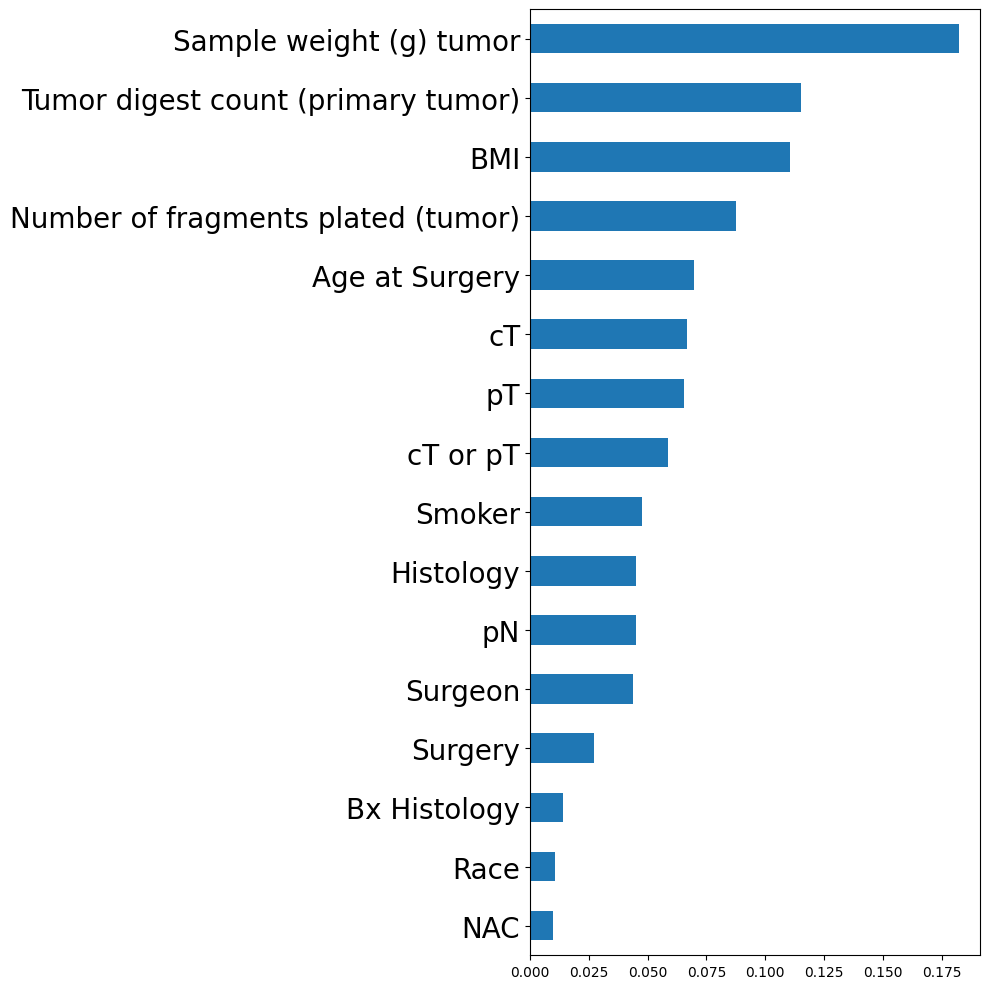

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)
           

# Train the classifier
clf.fit(X_trainA1, y_trainA1)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA1, y_testA1)))

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx], fontsize=20)
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
fig1.tight_layout()

savefig('./figs/RF_demo_clin_bio_01_IM')

Accuracy on test data: 0.77
('Surgeon', 0.08274371172213485)
('Age at Surgery', 0.09059582674283921)
('Race', 0.0026394359120863907)
('Surgery', 0.02701949357117408)
('Smoker', 0.03987063933204945)
('BMI', 0.10182831916115073)
('NAC', 0.0137359210705044)
('cT', 0.05906679878055627)
('pT', 0.03868399952960467)
('cT or pT', 0.05461123621498361)
('pN', 0.04774990455112583)
('Bx Histology', 0.024564516156889187)
('Histology', 0.07305304671716936)
('Sample weight (g) tumor', 0.15438471940084203)
('Tumor digest count (primary tumor)', 0.11244181798022812)
('Number of fragments plated (tumor)', 0.07701061315666179)


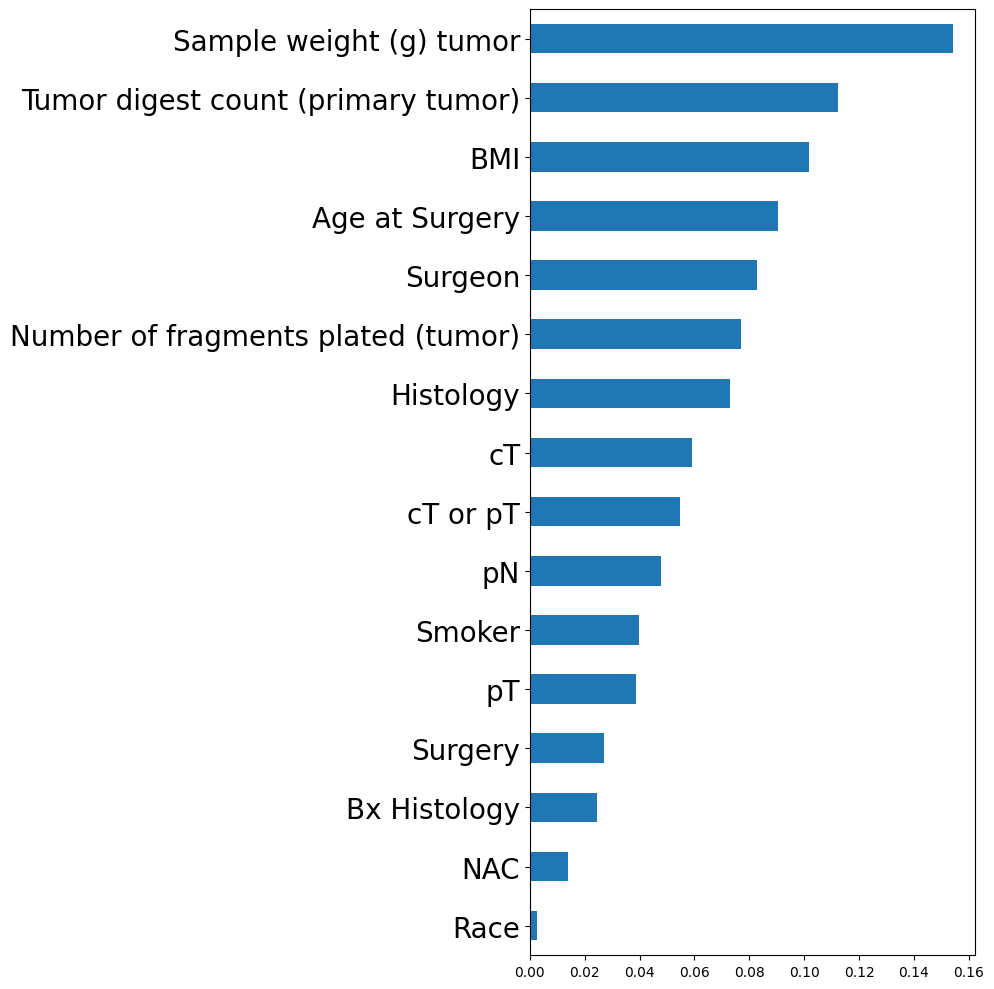

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)
           

# Train the classifier
clf.fit(X_trainA2, y_trainA2)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA2, y_testA2)))

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig2, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx], fontsize=20)
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
fig2.tight_layout()

savefig('./figs/RF_demo_clin_bio_02_IM')


Accuracy on test data: 0.65
('Surgeon', 0.07889618671251539)
('Age at Surgery', 0.08633038716023762)
('Race', 0.008282513937736796)
('Surgery', 0.027065726133299824)
('Smoker', 0.05099776400857305)
('BMI', 0.10523114736953161)
('NAC', 0.022492871970597135)
('cT', 0.0629428630528574)
('pT', 0.053497592914136936)
('cT or pT', 0.056577728314811275)
('pN', 0.04914710638243555)
('Bx Histology', 0.021767284456351028)
('Histology', 0.0679941706676747)
('Sample weight (g) tumor', 0.11887910891556695)
('Tumor digest count (primary tumor)', 0.09540592567424852)
('Number of fragments plated (tumor)', 0.09449162232942616)


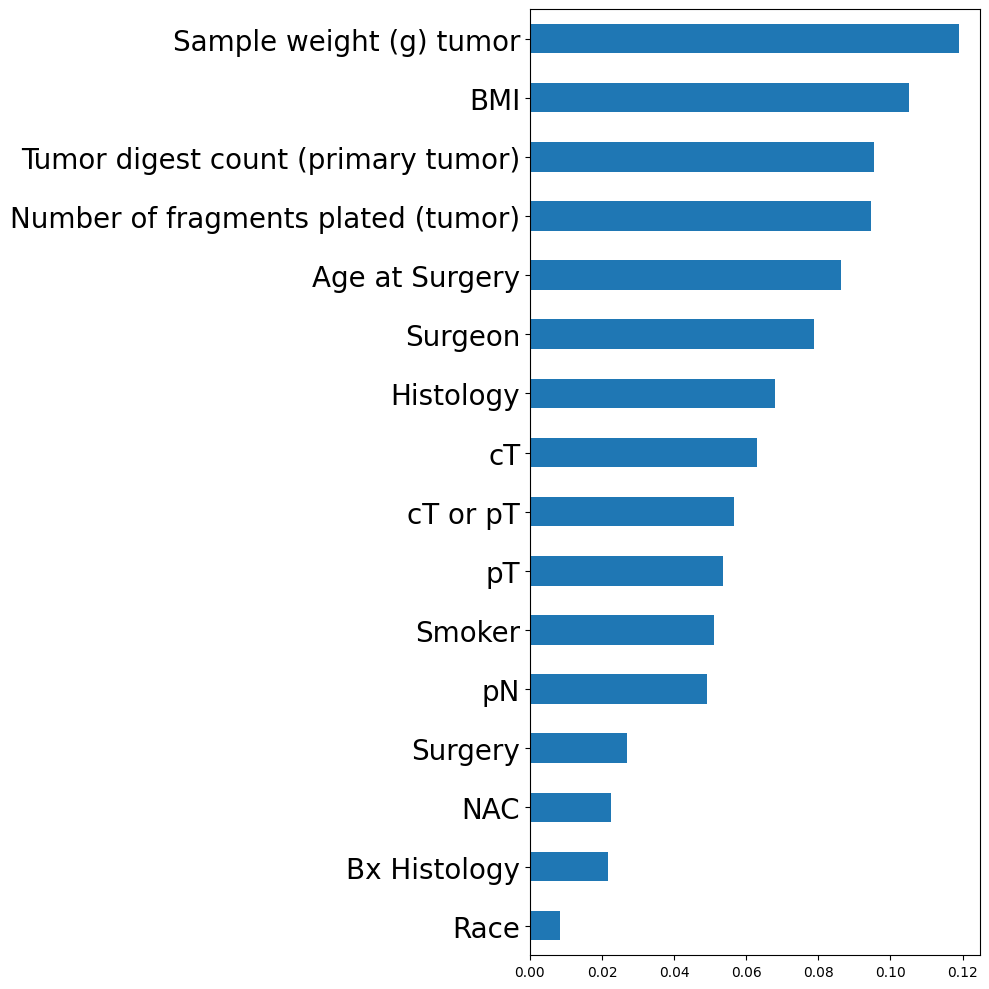

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA3, y_trainA3)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA3, y_testA3)))

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig3, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx], fontsize=20)
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
fig3.tight_layout()

savefig('./figs/RF_demo_clin_bio_03_IM')


Accuracy on test data: 0.58
('Surgeon', 0.053564403278646845)
('Age at Surgery', 0.08772949910008442)
('Race', 0.002976143327201773)
('Surgery', 0.01809144807048547)
('Smoker', 0.05214851540585604)
('BMI', 0.0975937765851364)
('NAC', 0.016472581043203097)
('cT', 0.043064235983281574)
('pT', 0.07849447957778337)
('cT or pT', 0.05336145982275515)
('pN', 0.03315899041498338)
('Bx Histology', 0.024189026346360203)
('Histology', 0.10080998876724154)
('Sample weight (g) tumor', 0.16859417027358126)
('Tumor digest count (primary tumor)', 0.10213627119589429)
('Number of fragments plated (tumor)', 0.06761501080750519)


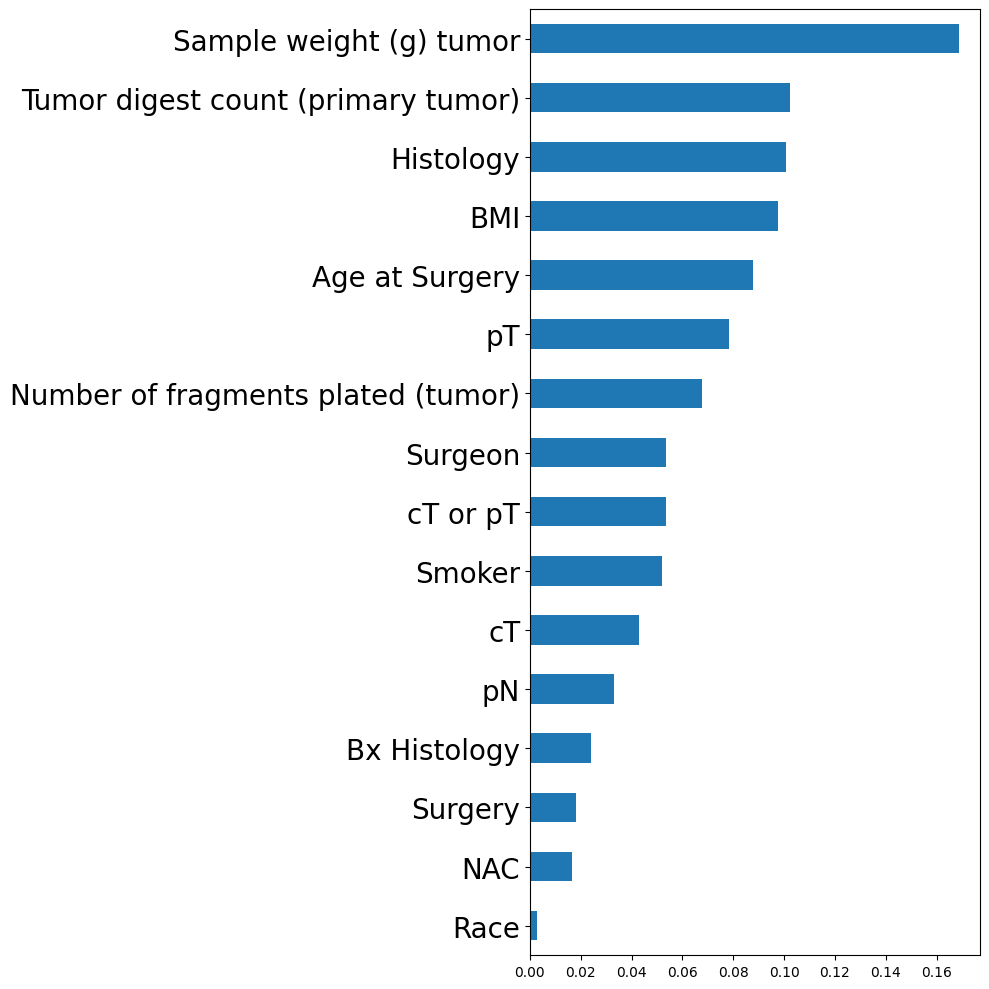

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)
            

# Train the classifier
clf.fit(X_trainA4, y_trainA4)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA4, y_testA4)))

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig4, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx], fontsize=20)
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
fig4.tight_layout()

savefig('./figs/RF_demo_clin_bio_04_IM')


Accuracy on test data: 0.69
('Surgeon', 0.0591519601907775)
('Age at Surgery', 0.10864778176755507)
('Race', 0.0006006973241183766)
('Surgery', 0.03981313980098865)
('Smoker', 0.035028978892896606)
('BMI', 0.11790303961644179)
('NAC', 0.012659097008118705)
('cT', 0.0732969241415663)
('pT', 0.05307767408795701)
('cT or pT', 0.0824995206449569)
('pN', 0.03844955212759843)
('Bx Histology', 0.02449057379343823)
('Histology', 0.05988165107828018)
('Sample weight (g) tumor', 0.10866655990830244)
('Tumor digest count (primary tumor)', 0.10431613742303289)
('Number of fragments plated (tumor)', 0.08151671219397097)


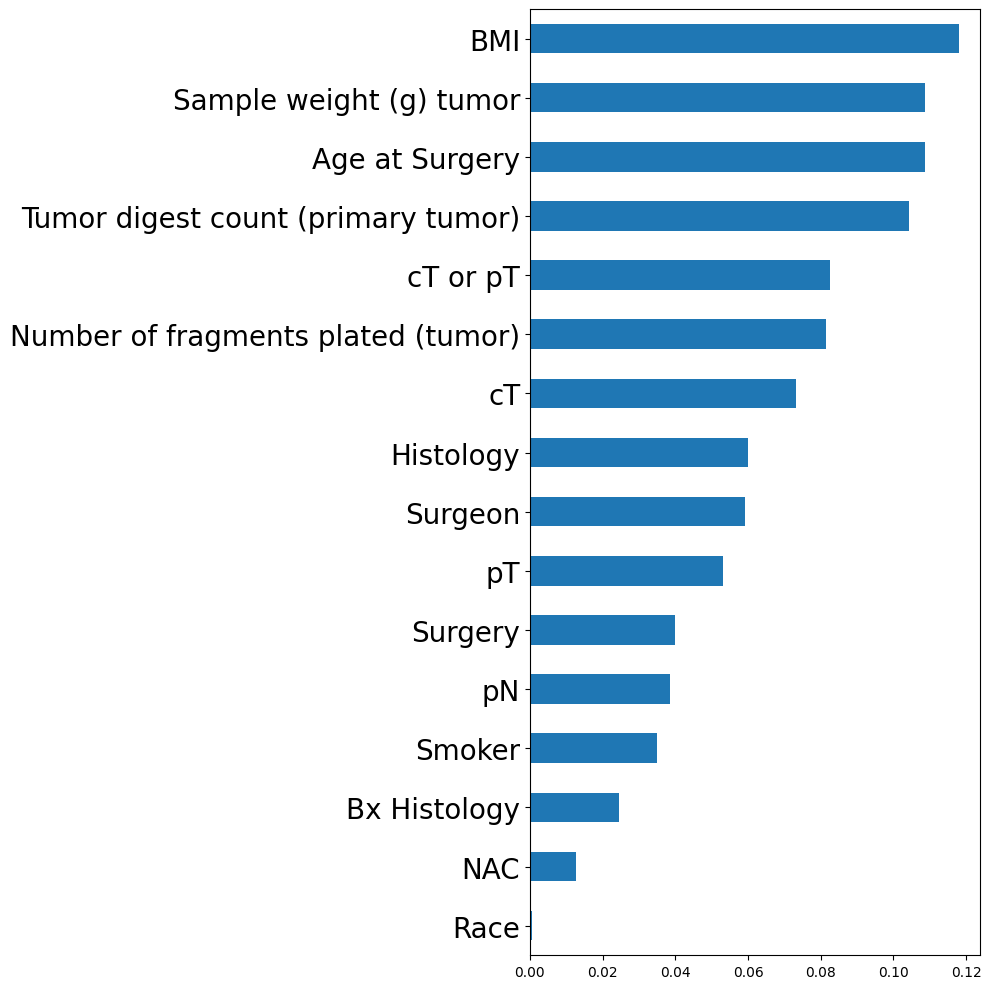

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)          

# Train the classifier
clf.fit(X_trainA5, y_trainA5)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA5, y_testA5)))

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig5, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
ax1.set_yticks(tree_indices)
#ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx], fontsize=20)
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
fig5.tight_layout()

savefig('./figs/RF_demo_clin_bio_05_IM')
